# Task 14

The problem: Predict whether or not a given passenger will survive the wreck of the RMS Titanic. We will use an open data set with data on the passengers aboard the infamous doomed sea voyage of 1912. By examining the data and looking at factors such as class, sex, and age build a simple program that can predict whether a given passenger would have survived this disaster or not.
This problem has two parts: data exploration, and actual calculation. The first part is 90% of where your effort will go, just like in the real world.

Data(to load into pandas):http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic3.xls.

Resources: Analyzing the Titanic dataset is sort of like one of the hello world problems of machine learning. For our purposes, I don't really care exactly how good your answer is. I want you to tackle a big problem using the internet and the pandas/the python ecosystem to learn. 

Feel free to look at anyone's data exploration and solutions you like as you put yours together. This is not an assessment. I want you to struggle and also to learn what others are doing and how they are doing it.

Here is a video: https://youtu.be/siEPqQsPLKA
Here is a link to Kaggle, where lots of people have spent time on this very problem. Learn from them! https://www.kaggle.com/c/titanic

Good luck!

For description of the dataset: http://campus.lakeforest.edu/frank/FILES/MLFfiles/Bio150/Titanic/TitanicMETA.pdf
For statistical modeling notebook: https://notebooks.azure.com/seanreed1111/libraries/gpython/html/StatisticalDataModeling.ipynb


## Exploring the data (Pandas / Matplotlib practice) 

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV

import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
%matplotlib inline


### Common Initial Steps
(1) Import file from xls
(2) Train / Test split
(3) Initial data exploration: visualization, group by calculations, ratios

In [5]:
#(1) putting the excel file into a Panda Data Frame
titanic = pd.read_excel('titanic3.xls')

In [6]:
titanic.keys()

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [8]:
#(2) splitting the data into two data frames
train, test = train_test_split(titanic, test_size=0.20, random_state=42)

#checking that train and test have column headers - check!
#print(train.describe())
#print(test.describe())

titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [9]:
#using a few functions on one of the data frames
print(titanic['age'].min())
print(train['age'].min())
print(test['age'].min())

#note: if you try to put a string inside the print and +, it won't let you
# this is how you do it: print('Number of samples:', n_samples)
print('learned how to insert text: ', test['age'].min())

0.1667
0.1667
0.6667
learned how to insert text:  0.6667


In [12]:
#finding out the type of data in each column
train.dtypes

#what does it mean for some to be "object"?

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

In [28]:
# we can view the ones which survived in train with train[train.survived > 0]

train[train.survived > 0]

# this doesn't work: train[train.survived > 0, train.sex == 'female']
# we can do this by
# not sure how to use "where" in this
train[(train.survived > 0) & (train.sex == "female")]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
380,2,1,"Cook, Mrs. (Selena Rogers)",female,22.0000,0,0,W./C. 14266,10.5000,F33,S,14,NaN,Pennsylvania
936,3,1,"Kink-Heilmann, Mrs. Anton (Luise Heilmann)",female,26.0000,1,1,315153,22.0250,NaN,S,2,NaN,NaN
867,3,1,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0000,1,1,3101298,12.2875,NaN,S,15,NaN,NaN
220,1,1,"Ostby, Miss. Helene Ragnhild",female,22.0000,0,1,113509,61.9792,B36,C,5,NaN,"Providence, RI"
785,3,1,"Dyker, Mrs. Adolf Fredrik (Anna Elisabeth Judi...",female,22.0000,1,0,347072,13.9000,NaN,S,16,NaN,"West Haven, CT"
872,3,1,"Howard, Miss. May Elizabeth",female,NaN,0,0,A. 2. 39186,8.0500,NaN,S,C,NaN,NaN
582,2,1,"Watt, Miss. Bertha J",female,12.0000,0,0,C.A. 33595,15.7500,NaN,S,9,NaN,"Aberdeen / Portland, OR"
1223,3,1,"Stanley, Miss. Amy Zillah Elsie",female,23.0000,0,0,CA. 2314,7.5500,NaN,S,C,NaN,NaN
478,2,1,"Laroche, Miss. Louise",female,1.0000,1,2,SC/Paris 2123,41.5792,NaN,C,14,NaN,Paris / Haiti
1004,3,1,"McDermott, Miss. Brigdet Delia",female,NaN,0,0,330932,7.7875,NaN,Q,13,NaN,NaN


In [19]:
# doing stuff with that
print(train.shape[0])
num_survived = len(train[train.survived > 0])
print(num_survived)
per_survived = num_survived / train.shape[0]
print(per_survived)

#this gives you the num survived ~ 38%

1178
442
0.37521222410865873


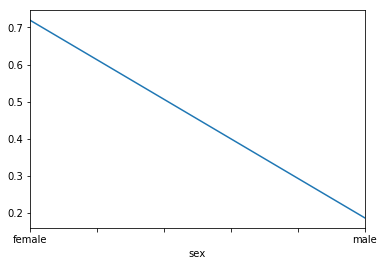

In [21]:
train.groupby('sex')['survived'].mean().plot()
#seems like the survival rate was disproportionate
# a line graph doesn't make much sense here, but just for practice

In [ ]:
# matplotlib histogram https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html
# matplotlib.pyplot.hist(x, bins=None, range=None, density=None, 
                        #weights=None, cumulative=False, bottom=None, 
                        #histtype='bar', align='mid', orientation='vertical', 
                        #rwidth=None, log=False, color=None, label=None, 
                        #stacked=False, normed=None, hold=None, data=None, **kwargs)

In [35]:
import pandas as pd
ranked_list = pd.Series([100,100,300]).rank()
type(ranked_list)

pandas.core.series.Series